# Redes Neuronales Para Regresión

In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.18.0


In [ ]:
import pandas as pd
import pathlib

url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
# No need to convert the URL to a pathlib.Path object
data = pd.read_csv(url, na_values = "?", comment = "\t", sep = " ", skipinitialspace = True)

print(data.head()) # To verify that the data is loaded correctly

   18.0  8  307.0  130.0   3504.  12.0  70  1
0  15.0  8  350.0  165.0  3693.0  11.5  70  1
1  18.0  8  318.0  150.0  3436.0  11.0  70  1
2  16.0  8  304.0  150.0  3433.0  12.0  70  1
3  17.0  8  302.0  140.0  3449.0  10.5  70  1
4  15.0  8  429.0  198.0  4341.0  10.0  70  1


In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [ ]:
data.columns = column_names

In [ ]:
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1
396,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
data.isnull().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


In [ ]:
import seaborn as sns

<Axes: >

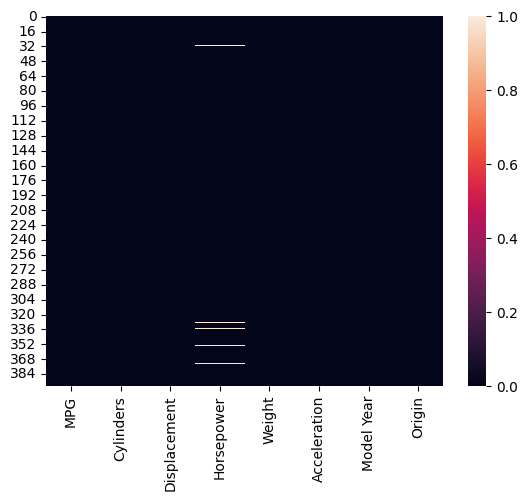

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.describe()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
data['Horsepower'].unique()

array([165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,  95.,
        97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,  nan,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 130., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
data.dropna(inplace=True)

<Axes: >

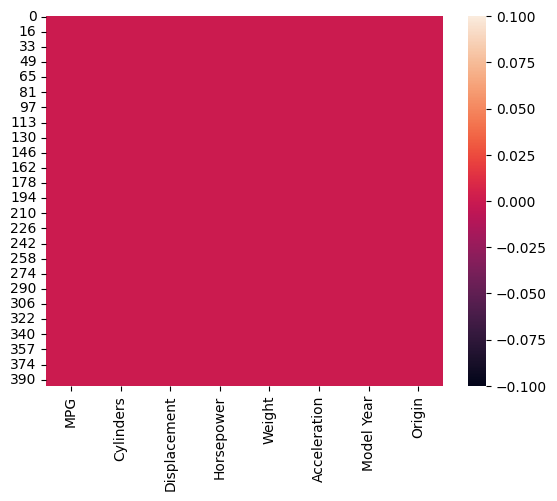

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [ ]:
origin = data.pop('Origin')

In [ ]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,15.0,8,350.0,165.0,3693.0,11.5,70
1,18.0,8,318.0,150.0,3436.0,11.0,70
2,16.0,8,304.0,150.0,3433.0,12.0,70
3,17.0,8,302.0,140.0,3449.0,10.5,70
4,15.0,8,429.0,198.0,4341.0,10.0,70


In [ ]:
data['USA'] = (origin == 1)*1.0
data['Europe'] = (origin == 2)*1.0
data['Japan'] = (origin == 3)*1.0
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
392,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
393,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
394,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
395,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
396,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X = data.drop(['MPG'], axis=1)
y = data['MPG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (312, 9)
Shape of y_train: (312,)
Shape of X_test: (79, 9)
Shape of y_test: (79,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFirst 5 rows of X_train_scaled:\n", X_train_scaled[:5])



First 5 rows of X_train_scaled:
 [[ 1.48318091  1.49809114  1.29644894  1.34773378 -0.93795591 -1.15192179
   0.75878691 -0.43163849 -0.51298918]
 [-0.8569073  -1.10290328 -1.20447827 -1.44308354  0.46863116  1.34198445
  -1.31789306 -0.43163849  1.94935887]
 [ 0.3131368  -0.47177964 -0.73061838  0.20860068  1.44242222  1.34198445
  -1.31789306  2.31675353 -0.51298918]
 [ 1.48318091  0.6279055   0.16445031  1.26661904  1.2260242   0.23358167
   0.75878691 -0.43163849 -0.51298918]
 [ 1.48318091  1.0486546   1.21747229  0.81049557 -1.47895094 -0.8748211
   0.75878691 -0.43163849 -0.51298918]]


In [ ]:
# Build the Keras Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # Output layer for regression (single continuous value)
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='mse', # Mean Squared Error
              metrics=['mae']) # Mean Absolute Error

# 6. Train the Model
print("\nTraining the model...")
history = model.fit(X_train_scaled, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# 7. Evaluate the Model
print("\nEvaluating the model on the test set...")
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()




Training the model...
Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 664.5917 - mae: 24.4381 - val_loss: 613.5918 - val_mae: 23.8328
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 609.4910 - mae: 23.3171 - val_loss: 593.9808 - val_mae: 23.4288
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 560.1290 - mae: 22.3742 - val_loss: 573.4261 - val_mae: 22.9961
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 564.0016 - mae: 22.4249 - val_loss: 549.7573 - val_mae: 22.4851
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 530.6439 - mae: 21.5865 - val_loss: 520.7393 - val_mae: 21.8408
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 483.8578 - mae: 20.6300 - val_loss: 484.9679 - val_mae: 21.0209
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 455.1541 - mae: 19.8178 - val_loss: 441.2648 - val_mae: 19.9801
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 393.3051 - mae: 18.3839 - val_loss: 390.2075 - val_mae: 18.6903
E

R-squared: 0.8767


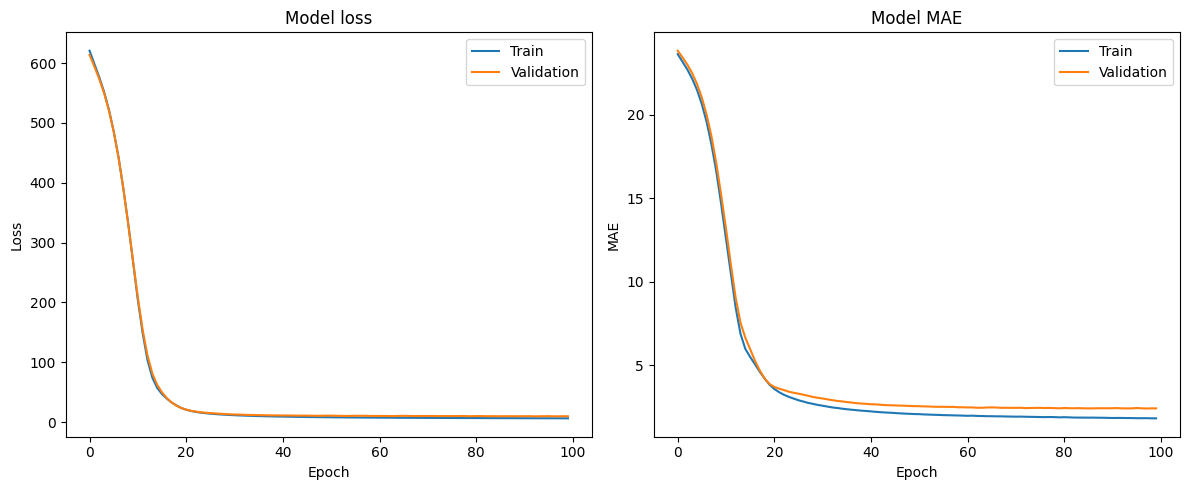

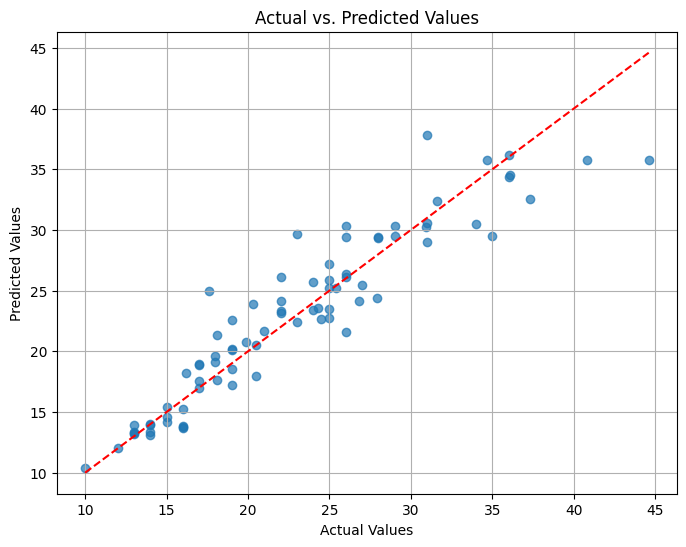

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
#Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# 8. Visualize Training History
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Visualize predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--') # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,261 (32.27 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,508 (21.52 KB)

In [ ]:
example_batch = X_train_scaled[:10]
example_result = model.predict(example_batch)
example_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[13.55246 ],
       [38.6604  ],
       [29.671946],
       [17.703955],
       [15.160209],
       [18.313396],
       [23.734884],
       [29.19881 ],
       [30.632593],
       [26.290045]], dtype=float32)

In [ ]:
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),  # para ver validación
                    epochs=100,
                    batch_size=16,
                    verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 57.7722 - mae: 6.6723 - val_loss: 10.8033 - val_mae: 2.6490
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.7784 - mae: 2.6067 - val_loss: 7.3327 - val_mae: 2.0955
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2153 - mae: 2.2429 - val_loss: 6.7135 - val_mae: 1.8493
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9686 - mae: 1.9405 - val_loss: 6.9915 - val_mae: 1.9727
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2736 - mae: 1.9876 - val_loss: 6.4088 - val_mae: 1.8349
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0539 - mae: 1.8730 - val_loss: 6.6920 - val_mae: 1.9025
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.3894 - mae: 1.8940 - val_loss: 6.6670 - val_mae: 1.8713
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.7160 - mae: 1.7398 - val_loss: 6.7032 - val_mae: 1.8945
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

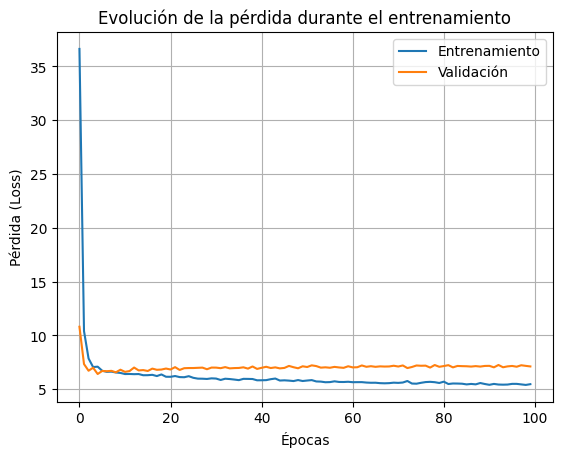

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (Loss)')
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.legend()
plt.grid(True)
plt.show()


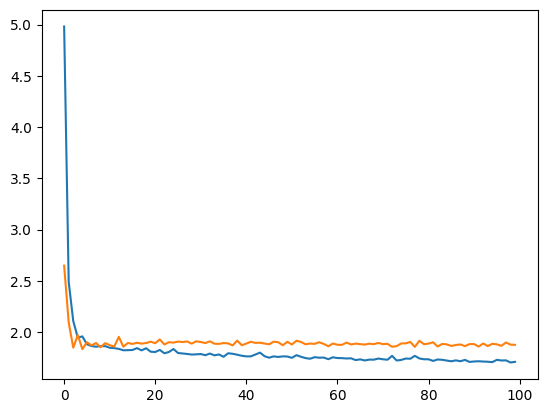

In [ ]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])  # <- agregas métricas

# Luego:
plt.plot(history.history['mae'], label='MAE Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE Validación')
